In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank1.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
df.shape

(11162, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


In [7]:
df.apply(lambda x : sum(x.isnull()))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [9]:
df.apply(lambda x: len(x.unique()))

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

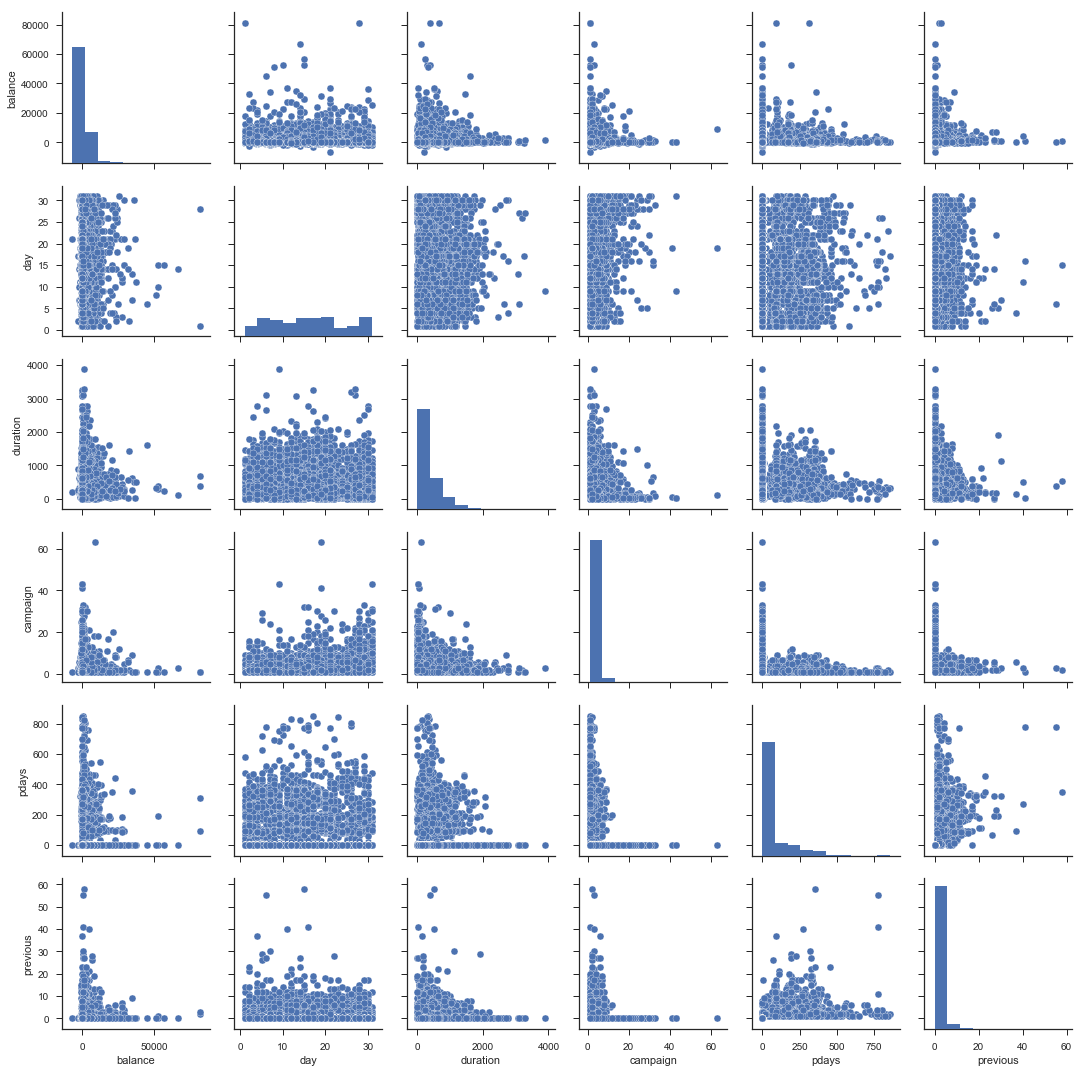

In [10]:
sns.pairplot(df.iloc[:,1:])

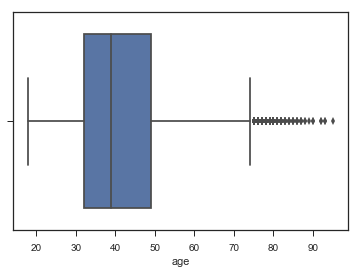

In [11]:
#Age Boxplot 
g = sns.boxplot(x=df["age"])

We can see that most of the customers are betwen the age of 30 to 50

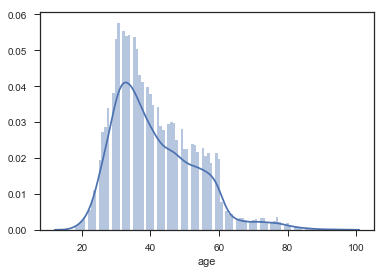

In [12]:
#Age Distribution
sns.distplot(df.age, bins=100)

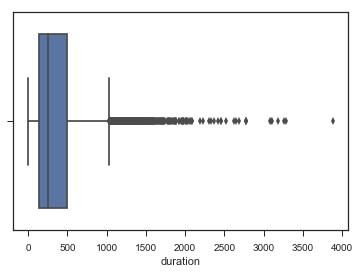

In [13]:
#Duration Boxplot
g = sns.boxplot(x=df["duration"])

The frequency is high between 0 to 500 

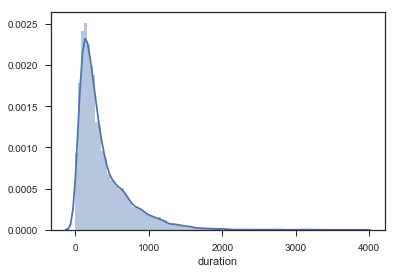

In [14]:
#Duration Distribution
sns.distplot(df.duration, bins=100)

In [15]:
df_copy = df.copy()

Exploring people who made a deposit vs Job category to understand which job category customers to taget

In [16]:
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(df_copy[(df_copy.deposit == "yes") & (df_copy.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [17]:
df_copy.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Combining similar jobs into categories

In [18]:
df_copy['job'] = df_copy['job'].replace(['management', 'admin.'], 'white-collar')
df_copy['job'] = df_copy['job'].replace(['services','housemaid'], 'pink-collar')
df_copy['job'] = df_copy['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [19]:
#Counting new values
df_copy.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [20]:
#moving to poutcome
df_copy.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [21]:
df_copy.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

Unknown and other do not really contribute to success or failure so we combine them as other

In [22]:
df_copy['poutcome'] = df_copy['poutcome'].replace(['other'] , 'unknown')
df_copy.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

Let's move to contact

In [24]:
df_copy.contact.unique

<bound method Series.unique of 0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
5          unknown
6          unknown
7          unknown
8          unknown
9          unknown
10         unknown
11         unknown
12         unknown
13         unknown
14         unknown
15         unknown
16         unknown
17         unknown
18         unknown
19         unknown
20         unknown
21         unknown
22         unknown
23         unknown
24         unknown
25         unknown
26         unknown
27         unknown
28         unknown
29         unknown
           ...    
11132      unknown
11133     cellular
11134    telephone
11135      unknown
11136     cellular
11137      unknown
11138    telephone
11139      unknown
11140      unknown
11141     cellular
11142     cellular
11143     cellular
11144      unknown
11145     cellular
11146     cellular
11147     cellular
11148      unknown
11149     cellular
11150     cellular
11151      unknown


We can drop this as every customer has been contacted some or the other way

In [25]:
df_copy.drop('contact', axis=1, inplace=True)

In [26]:
df_copy.default.unique()

array(['no', 'yes'], dtype=object)

We see that there are only 2 categories for "default" hence we convert yes to 1 and no to 0 for better analysis

In [28]:
df_copy["default"]
df_copy['default_cat'] = df_copy['default'].map( {'yes':1, 'no':0} )
df_copy.drop('default', axis=1,inplace = True)

We see that there are only 2 categories for "housing" hence we convert yes to 1 and no to 0 for better analysis

In [29]:
df_copy["housing_cat"]=df_copy['housing'].map({'yes':1, 'no':0})
df_copy.drop('housing', axis=1,inplace = True)

We see that there are only 2 categories for "loan" hence we convert yes to 1 and no to 0 for better analysis

In [32]:
df_copy["loan_cat"] = df_copy['loan'].map({'yes':1, 'no':0})
df_copy.drop('loan', axis=1, inplace=True)

We can drop month any day as they do not provide any important information

In [33]:
df_copy.drop('month', axis=1, inplace=True)
df_copy.drop('day', axis=1, inplace=True)

We see that there are only 2 categories for "deposit" hence we convert yes to 1 and no to 0 for better analysis

In [37]:
df_copy["deposit_cat"] = df_copy['deposit'].map({'yes':1, 'no':0})
df_copy.drop('deposit', axis=1, inplace=True)

In [40]:
print("Customers that have not been contacted before:", len(df_copy[df_copy.pdays==-1]))
print("Maximum values on pdays    :", df_copy['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on pdays    : 854


In [43]:
df_copy.loc[df_copy['pdays'] == -1, 'pdays'] = 10000

Creating a new column recent_pdays and dropping pdays

In [45]:
df_copy['recent_pdays'] = np.where(df_copy['pdays'], 1/df_copy.pdays, 1/df_copy.pdays)
df_copy.drop('pdays', axis=1, inplace = True)

In [46]:
df_copy.head()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,0,1,0,1,0.0001
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,0,0,1,0.0001
2,41,technician,married,secondary,1270,1389,1,0,unknown,0,1,0,1,0.0001
3,55,pink-collar,married,secondary,2476,579,1,0,unknown,0,1,0,1,0.0001
4,54,white-collar,married,tertiary,184,673,2,0,unknown,0,0,0,1,0.0001


Now we convert categorical variables to dummies

In [48]:
bank_with_dummies = pd.get_dummies(data=df_copy, columns = ['job', 'marital', 'education', 'poutcome'], 
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [49]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plotting to see the balance of most population

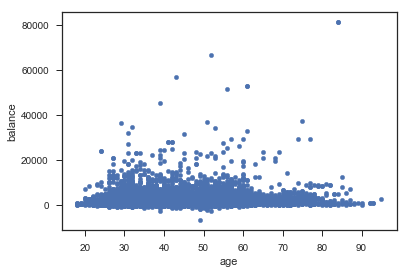

In [50]:
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

We observe that most of the population has a balance less that 20000

Let's plot a bar graph for deposit vs job

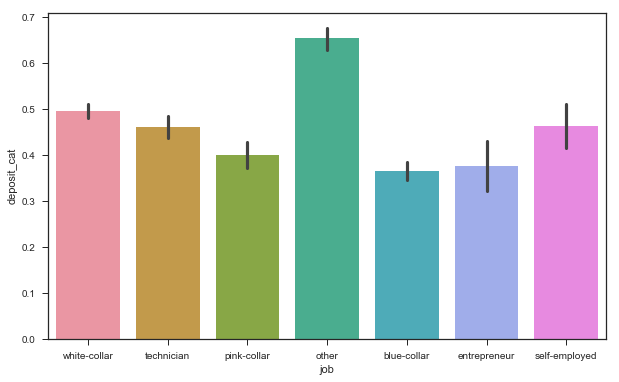

In [53]:
plot.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = df_copy)

Let's plot a bar graph for previous outcome vs call duration

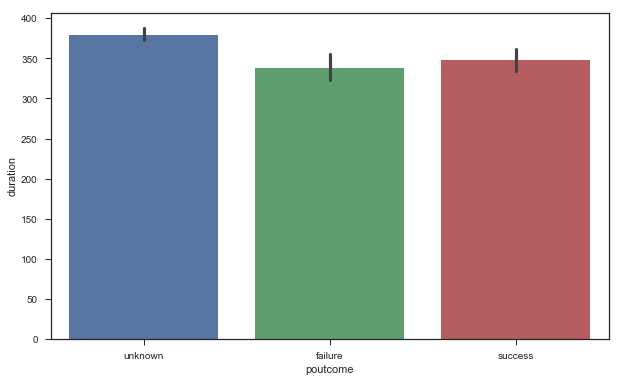

In [58]:
plot.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = df_copy)

Let's build the decision tree

In [59]:
data_classification = bank_with_dummies

Let's see the correlation matrix

In [60]:
correlation = data_classification.corr()
correlation

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


In [61]:
corr_deposite = pd.DataFrame(correlation['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


In [63]:
#Train-Test split: 80% training data and 20% test data
from sklearn.model_selection import train_test_split
data_drop_deposite = data_classification.drop('deposit_cat', 1)
label = data_classification.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [83]:
naive_model = GaussianNB()
naive_model.fit(data_train,label_train)

prediction = naive_model.predict(data_test)
naive_model.score(data_test,label_test)

0.7348858038513211

In [84]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(data_train,label_train)

prediction2 = randomforest_model.predict(data_test)
randomforest_model.score(data_test,label_test)

0.7398119122257053

In [86]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(data_train,label_train)

prediction3 = knn.predict(data_test)
knn.score(data_test,label_test)

0.7263770712046574

In [87]:
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(data_train,label_train)

prediction4 = dt_model.predict(data_test)
dt_model.score(data_test,label_test)

0.7568293775190327

Decision Tree Model seems to be performing the best

Building decision tree with depth 2

In [64]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


Building decision tree with depth 4

In [66]:
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


As, we observe higher the depth more like we're going to overfit due to more match between training and testing data.We can stick to depth 2 due to it's reasonably high Training and Testing Score

In [69]:
features = data_classification.columns.tolist()
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'deposit_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [70]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
deposit_cat......... 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.15069387609759496
poutcome_success.... 0.0


IndexError: index 26 is out of bounds for axis 0 with size 26

In [71]:
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


Calculating the probablity of a loan with a call duration of 371 seconds which is the mean

In [72]:
print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.48515568 0.51484432]]
[1]


The probablity is 0.51484432

Now checking the probablity with maximum call duration of 3881 seconds - we get 0.80704501

In [73]:
print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]
[1]


In [74]:
data_drop_deposite.iloc[985]

age                      46.000000
balance                3354.000000
duration                522.000000
campaign                  1.000000
previous                  1.000000
default_cat               0.000000
housing_cat               1.000000
loan_cat                  0.000000
recent_pdays              0.005747
job_blue-collar           0.000000
job_entrepreneur          0.000000
job_other                 1.000000
job_pink-collar           0.000000
job_self-employed         0.000000
job_technician            0.000000
job_white-collar          0.000000
marital_divorced          1.000000
marital_married           0.000000
marital_single            0.000000
education_primary         0.000000
education_secondary       1.000000
education_tertiary        0.000000
education_unknown         0.000000
poutcome_failure          0.000000
poutcome_success          1.000000
poutcome_unknown          0.000000
Name: 985, dtype: float64

In [75]:
#Probability for the below case

print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]


In [77]:
from sklearn import metrics
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609


# We can see that the longer the duration of the call the more likely it is that the customer buys the loan